In [1]:
### import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
### Read the dataset. Change name of csv file accordingly

df = pd.read_csv('train.csv', sep=';')
df.head()

,KOD,LG,LO,DSK,DSRW,ZWNM,LBM,GZAL,LNKM,POW,CPO,CPDB,OG,OOM,OwM,GAZ
0,1201000,86254.0,106514.0,655.3,972.9,22.2,26431.0,3444.0,164.0,649.0,23312.0,22235.0,26101.0,12093.0,10199.0,174048.0
1,1201011,27104.0,29922.0,150.9,90.4,31.7,5199.0,3452.0,1002.0,30.0,5040.0,4692.0,9503.0,4321.0,9503.0,70435.0
2,1201022,16368.0,19872.0,221.6,248.2,26.4,5621.0,3401.0,152.0,132.0,5167.0,4983.0,4690.0,2141.0,0.0,32035.0
3,1201042,4131.0,5642.0,16.5,3.4,3.2,1571.0,3244.0,94.0,60.0,1278.0,1227.0,1154.0,563.0,0.0,5685.5
4,1201052,5572.0,8139.0,28.7,167.7,34.7,2453.0,2823.0,114.0,72.0,1967.0,1891.0,1704.0,883.0,0.0,10595.6


In [3]:
### Reanamed columns

df = df.rename(columns={'KOD':'city_id', 'LG':'ppl_ng', 'LO':'ppl_city', 'DSK':'len_sew','DSRW':'len_water','ZWNM':'w_person',
                        'LBM':'numbuild','GZAL':'den_pop','LNKM':'ppl_km2','POW':'area_city','CPO':'numconn_buildgen',
                        'CPDB':'numconn_livbuild','OG':'num_ngconsum','OOM':'cust_ng_heat','OwM':'cust_city','GAZ':'ng_MWh'})

In [70]:
### Basic info grab

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city_id           756 non-null    int64  
 1   ppl_ng            756 non-null    float64
 2   ppl_city          756 non-null    float64
 3   len_sew           756 non-null    float64
 4   len_water         756 non-null    float64
 5   w_person          756 non-null    float64
 6   numbuild          756 non-null    float64
 7   den_pop           756 non-null    float64
 8   ppl_km2           756 non-null    float64
 9   area_city         756 non-null    float64
 10  numconn_buildgen  756 non-null    float64
 11  numconn_livbuild  756 non-null    float64
 12  num_ngconsum      756 non-null    float64
 13  cust_ng_heat      756 non-null    float64
 14  cust_city         756 non-null    float64
 15  ng_MWh            756 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 94.6 

In [8]:
df = pd.read_csv('train2.csv')

In [72]:
### Check for null values

df.isnull().any()

city_id             False
ppl_ng              False
ppl_city            False
len_sew             False
len_water           False
w_person            False
numbuild            False
den_pop             False
ppl_km2             False
area_city           False
numconn_buildgen    False
numconn_livbuild    False
num_ngconsum        False
cust_ng_heat        False
cust_city           False
ng_MWh              False
dtype: bool

In [10]:

df[df.ppl_ng==df.ppl_city]

,city_id,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
137,1210133,10650,10650,40.0,21.3,4.4,2523,3720,84,126,900,0,0,10650,0,52000.0
138,1210134,5882,5882,24.0,10.1,4.1,1454,4092,154,38,0,0,0,5882,0,18025.0
139,1210135,4768,4768,16.0,11.2,4.8,1069,3335,54,88,0,0,0,4658,0,14036.0
140,1210142,13170,13170,66.2,97.3,9.0,2869,5964,203,65,0,0,0,12546,0,48647.0
147,1211042,7631,7631,58.4,26.7,10.2,1948,3890,123,62,562,114,7200,7631,0,21056.9
148,1211052,18589,18589,333.2,107.9,27.2,5425,2549,87,212,4569,784,5860,18212,0,78369.4
149,1211062,6809,6809,43.3,24.2,19.4,1962,4096,119,57,7520,742,200,5963,0,12996.0
150,1211082,9341,9341,57.1,20.8,4.1,2333,3097,74,126,201,74,850,8745,0,18452.6
152,1211102,8564,8564,127.2,0.4,0.2,2236,4448,61,141,1420,1000,961,7141,0,16725.9
204,1215065,10279,10279,40.8,1.3,0.1,2755,2580,116,89,7806,4520,8452,0,0,109075.2


In [5]:
### Find correlation of different attributes

df.drop('city_id',axis = 1).corr()

,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
ppl_ng,1.000000,0.971099,0.721726,0.695085,0.251109,0.723684,0.281274,0.548450,0.325996,0.850677,0.832756,0.986800,0.941732,0.937215,0.964779
ppl_city,0.971099,1.000000,0.771948,0.748617,0.228804,0.800465,0.251417,0.487822,0.441729,0.841718,0.823459,0.962608,0.918568,0.912555,0.949892
len_sew,0.721726,0.771948,1.000000,0.863786,0.112247,0.922272,0.149271,0.198113,0.732694,0.886684,0.890501,0.640613,0.763836,0.506317,0.689301
len_water,0.695085,0.748617,0.863786,1.000000,0.222380,0.939802,0.080729,0.149056,0.743193,0.886469,0.892142,0.612162,0.752084,0.467851,0.671778
w_person,0.251109,0.228804,0.112247,0.222380,1.000000,0.127276,-0.108471,0.330346,-0.064325,0.171460,0.165941,0.256578,0.232450,0.268074,0.247992
numbuild,0.723684,0.800465,0.922272,0.939802,0.127276,1.000000,0.133475,0.170038,0.774450,0.915165,0.919705,0.643426,0.788172,0.500601,0.707100
den_pop,0.281274,0.251417,0.149271,0.080729,-0.108471,0.133475,1.000000,0.476478,-0.119739,0.187962,0.183793,0.269391,0.229930,0.269894,0.239501
ppl_km2,0.548450,0.487822,0.198113,0.149056,0.330346,0.170038,0.476478,1.000000,-0.157983,0.269541,0.258929,0.555718,0.413324,0.599644,0.457469
area_city,0.325996,0.441729,0.732694,0.743193,-0.064325,0.774450,-0.119739,-0.157983,1.000000,0.594400,0.608003,0.243274,0.388617,0.109838,0.298594
numconn_buildgen,0.850677,0.841718,0.886684,0.886469,0.171460,0.915165,0.187962,0.269541,0.594400,1.000000,0.998553,0.775793,0.917731,0.631818,0.840099


In [24]:
### Max Consumption of NG

df.loc[df.ng_MWh.idxmax()]

city_id             1261000.0
ppl_city             771069.0
len_sew                1505.7
len_water              1477.2
w_person                 46.4
numbuild              49890.0
den_pop                5324.0
ppl_km2                2359.0
area_city               327.0
numconn_buildgen      54537.0
numconn_livbuild      46016.0
num_ngconsum         251926.0
cust_ng_heat          63145.0
cust_city            251926.0
ng_MWh              1564331.0
Name: 269, dtype: float64

,city_id,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
0,1201000,106514.0,655.3,972.9,22.2,26431.0,3444.0,164.0,649.0,23312.0,22235.0,26101.0,12093.0,10199.0,174048.0
1,1201011,29922.0,150.9,90.4,31.7,5199.0,3452.0,1002.0,30.0,5040.0,4692.0,9503.0,4321.0,9503.0,70435.0
2,1201022,19872.0,221.6,248.2,26.4,5621.0,3401.0,152.0,132.0,5167.0,4983.0,4690.0,2141.0,0.0,32035.0
3,1201042,5642.0,16.5,3.4,3.2,1571.0,3244.0,94.0,60.0,1278.0,1227.0,1154.0,563.0,0.0,5685.5
4,1201052,8139.0,28.7,167.7,34.7,2453.0,2823.0,114.0,72.0,1967.0,1891.0,1704.0,883.0,0.0,10595.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2477011,127831.0,366.9,450.7,35.3,8690.0,4704.0,1563.0,82.0,8246.0,7959.0,41078.0,4253.0,41078.0,151816.0
752,2478000,173374.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0
753,2478011,173374.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0
754,2479000,62456.0,262.5,267.6,30.8,6291.0,4083.0,966.0,65.0,6178.0,5896.0,17947.0,3863.0,17947.0,85685.8


In [6]:
### Check for 0 values in Consumption of NG

df[(df.num_ngconsum==0)&(df.ng_MWh==0)]

,city_id,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
137,1210133,0.0,10650.0,40.0,21.3,4.4,2523.0,3720.0,84.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0
138,1210134,0.0,5882.0,24.0,10.1,4.1,1454.0,4092.0,154.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0
139,1210135,0.0,4768.0,16.0,11.2,4.8,1069.0,3335.0,54.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0
140,1210142,0.0,13170.0,66.2,97.3,9.0,2869.0,5964.0,203.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0
147,1211042,0.0,7631.0,58.4,26.7,10.2,1948.0,3890.0,123.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0
148,1211052,0.0,18589.0,333.2,107.9,27.2,5425.0,2549.0,87.0,212.0,0.0,0.0,0.0,0.0,0.0,0.0
149,1211062,0.0,6809.0,43.3,24.2,19.4,1962.0,4096.0,119.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0
150,1211082,0.0,9341.0,57.1,20.8,4.1,2333.0,3097.0,74.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1211102,0.0,8564.0,127.2,0.4,0.2,2236.0,4448.0,61.0,141.0,0.0,0.0,0.0,0.0,0.0,0.0
204,1215065,0.0,10279.0,40.8,1.3,0.1,2755.0,2580.0,116.0,89.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
### drop values where Consumption is zero

df = df[(df.ng_MWh!=0)]

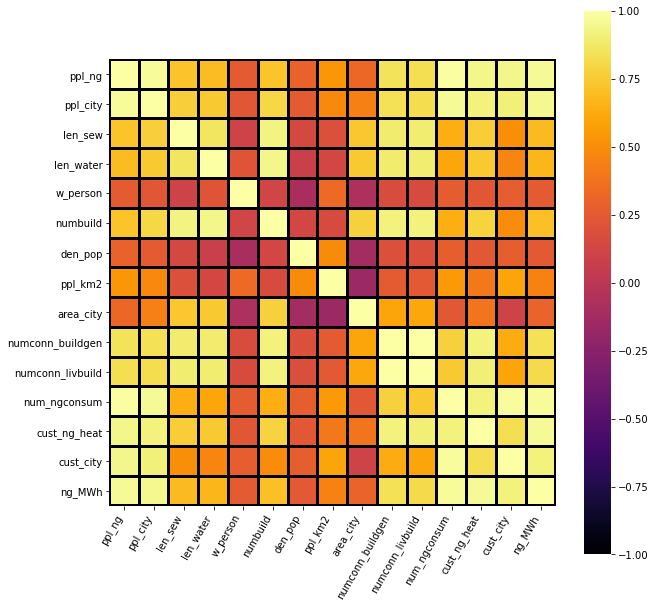

In [85]:
### Plot heatmap of correlation

corr = df.drop('city_id',axis =1).corr()

plt.pyplot.subplots(figsize=(10,10))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='inferno',
    square=True,
    linewidth=2,
    linecolor = 'black'
    

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=60,
    horizontalalignment='right'
);

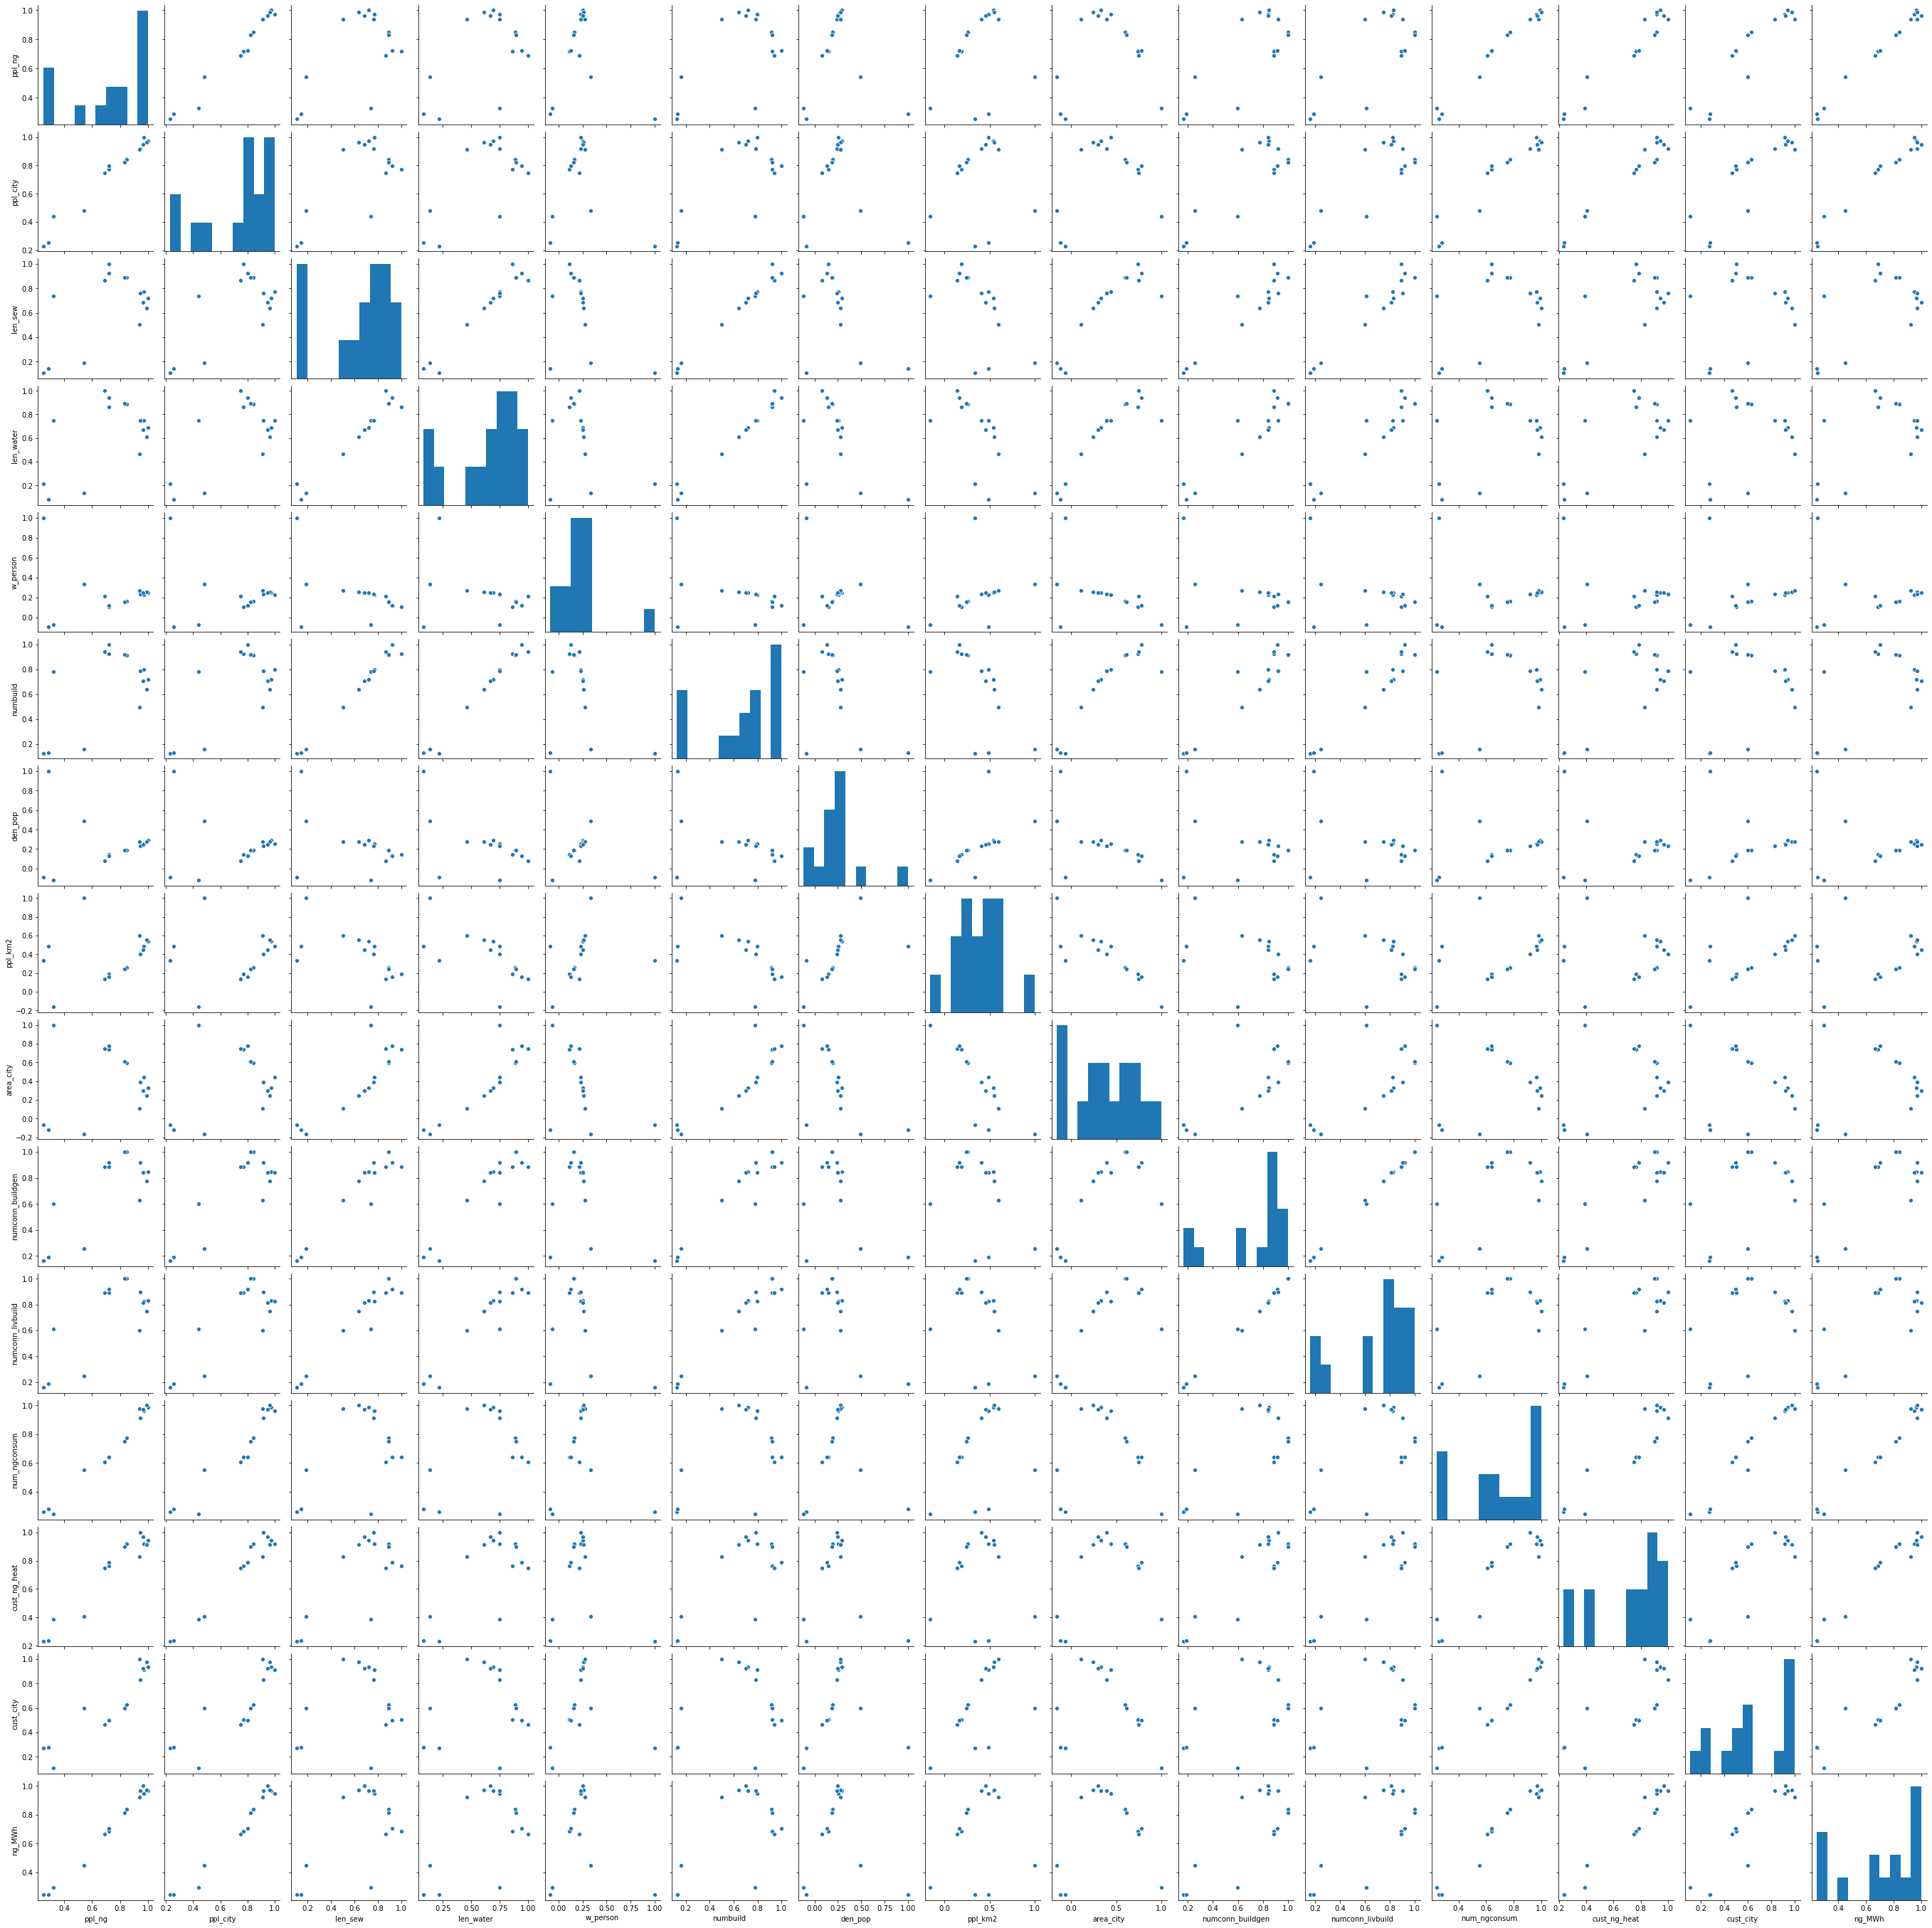

In [84]:
### Plot scatterplot between different attributes
sns.pairplot(df)

In [163]:
### Set index to city_id

df.set_index('city_id')

,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
city_id,,,,,,,,,,,,,,,
1201000,86254.0,106514.0,655.3,972.9,22.2,26431.0,3444.0,164.0,649.0,23312.0,22235.0,26101.0,12093.0,10199.0,174048.0
1201011,27104.0,29922.0,150.9,90.4,31.7,5199.0,3452.0,1002.0,30.0,5040.0,4692.0,9503.0,4321.0,9503.0,70435.0
1201022,16368.0,19872.0,221.6,248.2,26.4,5621.0,3401.0,152.0,132.0,5167.0,4983.0,4690.0,2141.0,0.0,32035.0
1201042,4131.0,5642.0,16.5,3.4,3.2,1571.0,3244.0,94.0,60.0,1278.0,1227.0,1154.0,563.0,0.0,5685.5
1201052,5572.0,8139.0,28.7,167.7,34.7,2453.0,2823.0,114.0,72.0,1967.0,1891.0,1704.0,883.0,0.0,10595.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477011,108357.0,127831.0,366.9,450.7,35.3,8690.0,4704.0,1563.0,82.0,8246.0,7959.0,41078.0,4253.0,41078.0,151816.0
2478000,133096.0,173374.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0
2478011,133096.0,173374.0,374.6,332.6,26.0,10408.0,4662.0,2156.0,80.0,10304.0,9816.0,48736.0,13881.0,48736.0,214912.0


In [8]:
### Check for 0 values in LO

df[(df['ppl_city']==0)]

,city_id,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh


In [11]:
### Save dframe to new csv file 

df.to_csv('train2.csv',index = False)

In [63]:
### Check for range distribution of values

df[(df.ng_MWh>0)&(df.ng_MWh<=690000)].count()

city_id             706
ppl_ng              706
ppl_city            706
len_sew             706
len_water           706
w_person            706
numbuild            706
den_pop             706
ppl_km2             706
area_city           706
numconn_buildgen    706
numconn_livbuild    706
num_ngconsum        706
cust_ng_heat        706
cust_city           706
ng_MWh              706
dtype: int64

In [65]:
### Index dframe for outlier data

df[df['ng_MWh']>600000]

,city_id,ppl_ng,ppl_city,len_sew,len_water,w_person,numbuild,den_pop,ppl_km2,area_city,numconn_buildgen,numconn_livbuild,num_ngconsum,cust_ng_heat,cust_city,ng_MWh
59,1206000,207025.0,277145.0,2007.6,2820.6,33.0,76484.0,3592.0,225.0,1231.0,63507.0,60170.0,64587.0,39829.0,12082.0,688027.5
269,1261000,537340.0,771069.0,1505.7,1477.2,46.4,49890.0,5324.0,2359.0,327.0,54537.0,46016.0,251926.0,63145.0,251926.0,1564331.0
270,1261011,537340.0,771069.0,1505.7,1477.2,46.4,49890.0,5324.0,2359.0,327.0,54537.0,46016.0,251926.0,63145.0,251926.0,1564331.0
